In [9]:
import numpy as np
import matplotlib.pyplot as plt


from scipy.optimize import fsolve
from scipy.optimize import minimize

/home/ambroise/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


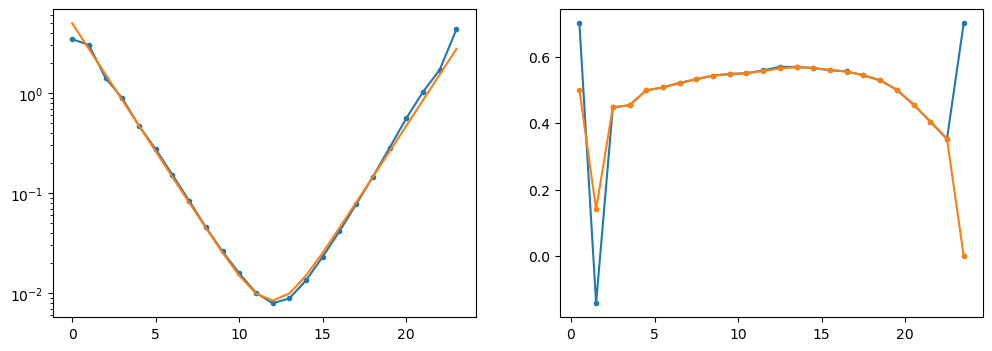

In [13]:
T = 24
t = np.arange(T)
C_pp = np.array(
    [3.46640325, 3.04148501, 1.41720855, 0.88899247, 0.47238375, 0.27469568,
    0.15284542, 0.08397096, 0.04570799, 0.0261224,  0.01575855, 0.01010149,
    0.00791652, 0.00886282, 0.01340243, 0.02320609, 0.04148746, 0.07739867,
    0.14591321, 0.28488408, 0.56058978, 1.02973104, 1.71385849, 4.34704093]
    )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(t, C_pp, '.-')
ax1.set_yscale('log')

A = 5
mfit = 0.59

fit1 = A*(np.exp(-mfit*t) + np.exp(-mfit*(T-t)))
fit2 = 2*A*np.exp(-mfit*(T//2))*np.cosh(mfit*(T//2-t))

# ax1.plot(fit1)
ax1.plot(fit2)


m0 = 0.7
m = np.zeros(T)

def equation_to_solve(m_eff, n_t, N_T, c_ratio):
    return c_ratio * np.cosh(m_eff * ((n_t + 1)//N_T - N_T/2)) - np.cosh(m_eff * (n_t - N_T/2))

for i in range(T):
    n_t_val = i
    N_T_val = T
    R_val = C_pp[i]/C_pp[(i+1)//T]
    m_eff_guess = 0.5
    m_eff_solution = fsolve(equation_to_solve, m_eff_guess, args=(n_t_val, N_T_val, R_val))
    m[i] = m_eff_solution

ax2.plot(t+0.5, m, '.-')